In [1]:
import logging
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pykeen
from pykeen.kge_models import TransE

In [2]:
%matplotlib inline

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [4]:
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [5]:
print(time.asctime())

Tue Apr 30 16:23:33 2019


In [6]:
print(pykeen.get_version())

0.0.26-dev


Check which hyper-parameters are required by TransE:

In [7]:
TransE.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'scoring_function',
 'normalization_of_entities']

Define output directory:

In [8]:
output_directory = 'D:/uni/master/models/test/'

Define hyper-parameters inclduing the evaluation information:
 * If no test set is available define the ration of the training set that should be used as test set: **test_set_ratio**
 * Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [9]:
config = dict(
    metrics                     = ['prediction'],
    training_set_path           = 'D:/uni/master/PyKEEN/tests/resources/data/rdf.nt',
    test_set_path               = 'D:/uni/master/PyKEEN/tests/resources/data/rdf.nt',
    #neg_test_path               = neg_test_path[relation_to_test],
    execution_mode              = 'Training_mode',
    random_seed                 = 0,
    kg_embedding_model_name     = 'TransE',
    embedding_dim               = 50,
    scoring_function            = 1,  # corresponds to L1
    normalization_of_entities   = 2,  # corresponds to L2
    margin_loss                 = 1,
    learning_rate               = 0.01,
    num_epochs                  = 30,  
    batch_size                  = 128,
    filter_negative_triples     = True,
    preferred_device            = 'cpu'
)

Train and evaluate TransE:

In [10]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

True
[[44  3 16]
 [44  5 17]
 [44  8 87]
 [45  8 37]
 [45 10 86]
 [45 11 86]
 [45 18  2]
 [46  3 33]
 [46  6 30]
 [46  7 31]
 [46  8 29]
 [46 16 38]
 [47  3 19]
 [47  5 42]
 [47  6 39]
 [47  7 14]
 [47 12 88]
 [48  1 34]
 [48  2  6]
 [48 13  3]
 [49  1 35]
 [49  2  5]
 [50  1 78]
 [50  2  6]
 [51  1 78]
 [51  2  8]
 [51  4  0]
 [52  1 78]
 [52  2  8]
 [52 14  9]
 [52 15 35]
 [53  1 78]
 [53  2  8]
 [53 14 11]
 [53 15 35]
 [54  1 78]
 [54  4 23]
 [54 15 35]
 [55  1 78]
 [55  4 23]
 [55 15 35]
 [56  1 78]
 [56  4 22]
 [56 15 35]
 [57  1 78]
 [57  4 21]
 [57 15 35]
 [58  1 78]
 [58  4 21]
 [58 15 35]
 [59  1 78]
 [59  4 24]
 [59 15 35]
 [60  1 78]
 [60  4 15]
 [60 15 35]
 [61  1 78]
 [61  4 43]
 [61 15 35]
 [62  1 78]
 [62  4 41]
 [62 15 35]
 [63  1 78]
 [63  4 25]
 [63 15 35]
 [64  1 78]
 [64  4 25]
 [64 15 35]
 [65  1 78]
 [65  4 25]
 [65 15 35]
 [66  4 26]
 [67  1 13]
 [67  4 28]
 [68  1 78]
 [68  2  6]
 [69  1 78]
 [69 15 12]
 [70  1 35]
 [70  2  7]
 [70  4 36]
 [70 15 35]
 [71  1 78]

INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
INFO:pykeen.utilities.train_utils:Epoch  0 /  30 (0.0 s):   loss: 1.26   val loss: 1.19
INFO:pykeen.utilities.train_utils:Epoch  1 /  30 (0.0 s):   loss: 1.11   val loss: 1.19
INFO:pykeen.utilities.train_utils:Epoch  2 /  30 (0.0 s):   loss: 1.08   val loss: 1.08
INFO:pykeen.utilities.train_utils:Epoch  3 /  30 (0.0 s):   loss: 1.15   val loss: 1.19
INFO:pykeen.utilities.train_utils:Epoch  4 /  30 (0.0 s):   loss: 1.28   val loss: 1.21
INFO:pykeen.utilities.train_utils:Epoch  5 /  30 (0.0 s):   loss: 1.04   val loss: 1.03
INFO:pykeen.utilities.train_utils:Epoch  6 /  30 (0.0 s):   loss: 1.17   val loss: 1.20
INFO:pykeen.utilities.train_utils:Epoch  7 /  30 (0.0 s):   loss: 1.13   val loss: 1.17
INFO:pykeen.utilities.train_utils:Epoch  8 /  30 (0.0 s):   loss: 1.18   val loss: 1.15
INFO:pykeen.utilities.train_utils:Epoch  9 /  30 (0.0 s):   loss: 1.32   val loss: 1.17
INFO:pykeen.utilities.pipeline:------------

Check result entries:

In [11]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'validation_losses', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration', 'search_summary'])

Access trained model:

In [12]:
results.results['trained_model']

TransE(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(89, 50)
  (relation_embeddings): Embedding(24, 50)
)

Visualize loss values:

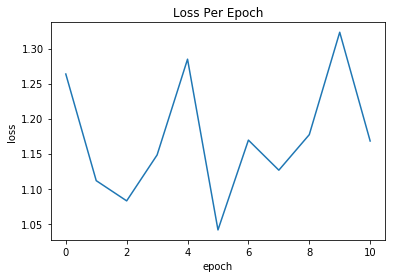

In [13]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

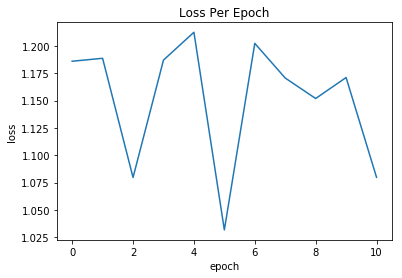

In [17]:
losses = results.results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [14]:
results.results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': 1.0,
 'recall': 1.0,
 'accuracy': 1.0,
 'f1_score': 1.0}